In [5]:
from pathlib import Path
import itertools

import matplotlib.patches as mpatches
import matplotlib.collections as mcollections
import matplotlib.path as mpath
import matplotlib.pyplot as plt

import themepy
spath = Path("../../../draft/figures/math/")

theme = themepy.Theme('paper')

%matplotlib inline

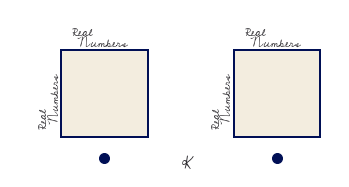

In [169]:

fig, ax = plt.subplots()

f1 = mpatches.Rectangle((2,4), 2, 2, facecolor=ax.get_facecolor(), edgecolor='C0', linewidth=2)
ax.add_patch(f1)
ax.annotate("Real\n Numbers", (1.5, 4.25), fontsize=12, rotation=90)
ax.annotate("Real\n Numbers", (2.25, 6.05), fontsize=12)

f2 = mpatches.Rectangle((6,4), 2, 2, facecolor=ax.get_facecolor(), edgecolor='C0', linewidth=2)
ax.add_patch(f2)
ax.annotate("Real\n Numbers", (5.5, 4.25), fontsize=12, rotation=90)
ax.annotate("Real\n Numbers", (6.25, 6.05), fontsize=12)

ax.scatter([3, 7], [3.5, 3.5], s=100)
ax.annotate('K', (4.8,3.25), fontsize=16)

ax.set(ylim=(3, 7), xlim=(.75,8.5), aspect='equal')
ax.axis('off')

fig.savefig(spath/"temp_1k.png", bbox_inches='tight' , facecolor='white')


[(-5.0, 5.0), (-5.0, 5.0)]

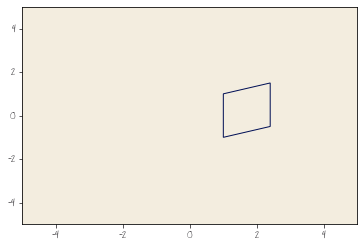

In [281]:

fig, ax = plt.subplots()
verts = np.array([[1,-1], [1,1], [2.4, 1.5], [2.4, -.5], [1,-1]]) 
p = mpatches.PathPatch(mpath.Path(verts, closed=True), edgecolor='C0',facecolor=ax.get_facecolor())
ax.add_patch(p)
ax.set(xlim=(-5,5), ylim=(-5,5))

In [45]:
from matplotlib.collections import PolyCollection
import numpy as np
verts = [[0, 0, -2 ],[-1, -1, -1], [1, -1,  -1], [1, 1,  -1 ], 
                 [-1, 1, -1], [-1, -1, 1],  [1, -1, 1 ],
                  [1, 1, 1], [-1, 1, 1]]
V = np.array(verts)*.5
sides = {'TOP': [V[5], V[6], V[7], V[8]], 
         'F1': [V[1], V[2], V[6], V[5]], 
         'F2': [V[2], V[3], V[7], V[6]],
         'F3': [V[3], V[4], V[8], V[7]], 
         'F4': [V[4], V[1], V[5], V[8]], 
         'BOTTOM': [V[1], V[2], V[3], V[4]]}
front_facing = np.vstack([sides['TOP'], sides['F1'], sides['F2']])[:, [0,2]]
print(front_facing.shape)

(12, 2)


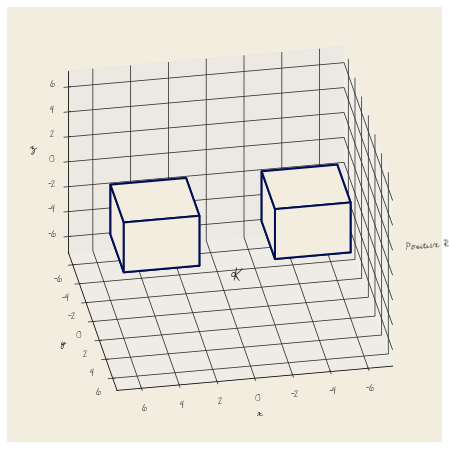

In [261]:
from mpl_toolkits.mplot3d import Axes3D, art3d
fig, ax = plt.subplots(subplot_kw={'projection':'3d', 'proj_type':'ortho'}, figsize=(8,8))

verts = np.array(list(sides.values()))
collection = art3d.Poly3DCollection(verts*4+[-4,0, 0], 
                                    closed=True, facecolor=ax.get_facecolor(), edgecolor=line.get_color(), linewidth=2)
ax.add_collection(collection)

collection2 = art3d.Poly3DCollection(verts*4+[4,0, 0], 
                                    closed=True, facecolor=ax.get_facecolor(), edgecolor=line.get_color(), linewidth=2)
ax.add_collection(collection2)

ax.text(0,0,-5,s='K', fontsize=16)
ax.text(-8, 7, 1.75, "Positive Reals", zdir=(1,0,0)) #top
#ax.text(-3.25, -3, 1.25, "Reals", zdir=(1,0,0))#top
#ax.text(1.75, 9, 2.5, "Reals", zdir=(0,0,1))#side

#x, y, z
#ax.text(5, 10, 3.75, "Positive\nReals", zdir=(0,1,0)) #top
#ax.text(4.5, -2, 2.25, "Reals", zdir=(1,0,0))#top
#ax.text(7.15, 0, 0, "Reals", zdir=(0,0,-1))#top
#ax.text2D(0.05, 0.95, "2D Text", transform=ax.transAxes)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.set_xlim([-7, 7])
ax.set_ylim([-7, 7])
ax.set_zlim([-7, 7])

ax.view_init(30, azim=80)

#ax.axis('off')
#ax.set_facecolor("white")

fig.savefig(spath/"temp_3f.png", bbox_inches='tight', facecolor='white' )

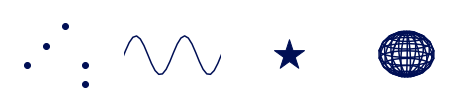

In [263]:
fig, axd = plt.subplot_mosaic([["dots", "line", "box", "sphere"]], figsize=(8,4))
for k in axd.keys():
    axd[k].set_aspect("equal")
    axd[k].set(xlim=(0,5), ylim=(0,5))
    axd[k].axis('off')
axd['sphere'].remove()
axd['sphere'] = fig.add_subplot(1,4,4,projection='3d')

axd['dots'].scatter([1,4,3,4, 2], [2,1,4,2, 3])
x = np.linspace(-3*np.pi, 3*np.pi, 100)
axd['line'].plot(x, np.sin(x*2.5)+2.5)
axd['box'].scatter(2.5, 2.5, marker='*', s=1000)

# draw sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)*5
y = np.sin(u)*np.sin(v)*5
z = np.cos(v)*5
axd['sphere'].plot_wireframe(x, y, z)
axd['sphere'].axis('off')
axd['sphere'].view_init(15, azim=30)
axd['sphere'].set_facecolor('white')
fig.savefig(spath/"k_different_types.png", bbox_inches='tight', facecolor='white' )

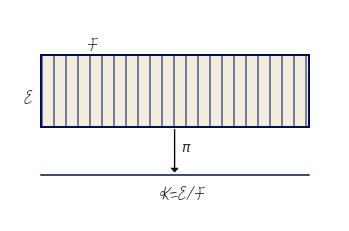

In [265]:
fig, ax = plt.subplots()
E = mpatches.Rectangle((0.1, 0.4), .8, .3,  hatch='|', facecolor=ax.get_facecolor(), edgecolor=line.get_color(), linewidth=2)
ax.add_patch(E)
ax.annotate('E', (.05, .5), fontsize=16)
line = ax.axhline(y=.2, xmin=0.1, xmax=0.9)
ax.annotate('K=E/F', (.455, .1), fontsize=16)
ax.annotate('F', (.24, 0.72), fontsize=16)
ax.annotate(r'$\pi$', (.52, 0.3), fontsize=14)
ax.arrow(.5, .39, 0, -.16,  head_width=0.02, head_length=0.015)
ax.set(xlim=(0,1), ylim=(0,.9))
ax.axis('off')
fig.savefig(spath/"k_qspace.png", bbox_inches='tight', facecolor='white')

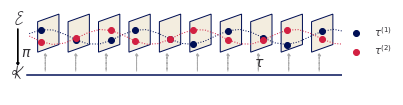

In [307]:
fig, ax = plt.subplots()
x =  np.linspace(-5*np.pi, 7*np.pi)
xv = x[(x>0) & (x <30)]
ys = np.sin(xv)*.5
yc = np.cos(xv+1)*.5

for off in np.arange(0,20,2):
    verts = np.array([[1,-1], [1,1], [2.4, 1.5], [2.4, -.5], [1,-1]]) + [off, 0]
    p = mpatches.PathPatch(mpath.Path(verts, closed=True), edgecolor='C0',facecolor=ax.get_facecolor())
    ax.add_patch(p)
    ax.arrow(off+1.5, -2.25, 0, 1, head_width=0.2, head_length=0.15, linestyle='--', color='darkgrey')


inds = [1, 4, 7, 9, 12, 14, 17, 20, 22, 25]
ax.scatter(xv[inds], ys[inds], color='C0', label=r'$\tau^{(1)}$', zorder=10)
ax.scatter(xv[inds], yc[inds], color='C1', label=r'$\tau^{(2)}$', zorder=10)
ax.plot(xv, ys, color='C0', linewidth=1, linestyle=':')
ax.plot(xv, yc, color='C1', linewidth=1, linestyle=':')

ax.annotate('E', (-.5, .8), fontsize=16)
ax.annotate('K', (-.7, -2.75), fontsize=16)
ax.arrow(-.3, .55, 0, -2.25, head_width=0.2, head_length=0.15)
ax.annotate(r'$\pi$', (-.1, -1.30), fontsize=14)
ax.annotate(r'$\tau$', (15.2, -1.95), fontsize=14)
ax.axhline(y=-2.5, xmin=0.06, zorder=-1)
ax.legend(bbox_to_anchor=(1.0, .4), loc='lower left', borderaxespad=0, facecolor='white', frameon=False)

ax.set(xlim=(-1,21), ylim=(-4, 2), aspect='equal')
ax.axis('off')
fig.savefig(spath/"fiberbundle.png", bbox_inches='tight', facecolor='white' )

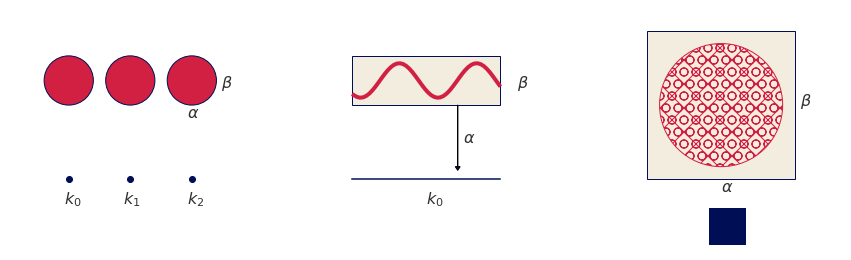

In [267]:
fig, axd = plt.subplot_mosaic([['circle', 'line', 'image']], figsize=(15,10))

for k in axd.keys():
    axd[k].set_aspect("equal")
    axd[k].set(xlim=(0,1), ylim=(0,1))
    axd[k].axis('off')

xpos = [.25,.5,.75]

s = axd['circle'].scatter(xpos, [.3,.3,.3])
circles = [mpatches.Circle((x, .7), radius=.1) for x in xpos]
pc = mcollections.PatchCollection(circles, facecolor='C1', edgecolor=s.get_facecolor(), zorder=4)
axd['circle'].add_collection(pc)
axd['circle'].annotate(r'$\alpha$', (0.73, 0.55), fontsize=16)
axd['circle'].annotate(r'$\beta$', (0.87, 0.67), fontsize=16)

axd['circle'].annotate(r'$k_0$', (0.23, 0.2), fontsize=16)
axd['circle'].annotate(r'$k_1$', (0.47, 0.2), fontsize=16)
axd['circle'].annotate(r'$k_2$', (0.73, 0.2), fontsize=16)

xposl = [.2, .6, .8]
l = axd['line'].axhline(y=.3, xmin=xposl[0], xmax=xposl[-1])
b1 = mpatches.Rectangle((xposl[0], 0.6), height=.2, width=(xposl[-1]-xposl[0]), 
                        facecolor=ax.get_facecolor(), edgecolor=l.get_color())
axd['line'].add_patch(b1)
x = np.linspace(-2*np.pi, np.pi*2, 1000)
inds = ((x>xposl[0]) & (x<xposl[-1]))
y = np.sin(x*20)*.07 + .7
axd['line'].plot(x[inds], y[inds], color='C1', linewidth=4)

axd['line'].annotate(r'$\alpha$', (0.65, 0.45), fontsize=16)
axd['line'].annotate(r'$\beta$', (0.87, 0.67), fontsize=16)
axd['line'].annotate(r'$k_0$', (0.5, 0.2), fontsize=16)
axd['line'].arrow(.63, .6, 0, -.25,  head_width=0.02, head_length=0.015)

s1 = mpatches.Rectangle((0.45,0.03), .15, .15)
axd['image'].add_patch(s1)

s2 = mpatches.Rectangle((0.2, 0.3), .6, .6,facecolor=ax.get_facecolor(), edgecolor=l.get_color())
axd['image'].add_patch(s2)

smile = mpatches.Circle((.5,.6), radius=.25, facecolor=ax.get_facecolor(), edgecolor='C1', hatch='Ox')
axd['image'].add_patch(smile)
axd['image'].annotate(r'$\alpha$', (0.5, 0.25), fontsize=16)
axd['image'].annotate(r'$\beta$', (0.82, 0.6), fontsize=16)

fig.savefig(spath/"retraction_maps.png", bbox_inches='tight' )

In [ ]:
import matplotlib.ticker as mticker
from matplotlib.patches import ConnectionPatch
black = (0,0,0)
face_r =  (217,1,102)
face_h = '#d90166'
face_h = 'C1'
edge_r = black
edge_h = None
alpha=1

sub = 3
columns = ['x', 'y', 'z', 'r', 'g', 'b', 'a']
band = [(f'{xi:.2f}', f'{yi:.2f}', 1, face_r[0], face_r[1], face_r[2], alpha) for xi,yi in vertices[:sub]] 
line = [(f'{xi:.2f}', f'{yi:.2f}', 100, edge_r[0], edge_r[1], edge_r[2], alpha) for xi, yi in zip(x[:sub],y[:sub])]
middle = ['...' for _ in range(7)]
r7 = np.vstack([band, middle, line])

['bundle', 'simplex', 'ideal', 'screen' ]
fig, axd = plt.subplot_mosaic([['simplex', 'ideal'], ['bundle', 'screen']], constrained_layout=True)
axd['bundle'].table(r7,colLabels=columns, loc='center', fontsize=12 )
axd['bundle'].axis('off')

fx, fy = (0.4, 0.6)
circle = mpatches.Circle((.5,.5), .3, facecolor=ax.get_facecolor(), edgecolor='C0')
axd['simplex'].add_patch(circle)
axd['simplex'].scatter(fx, fy, s=25, color='k')
axd['simplex'].annotate("S", (.05, .5), fontsize=16)
axd['simplex'].set(aspect='equal', xlim=(0,1), ylim=(0,1))
axd['simplex'].axis('off')

path = Path(vertices, codes)
patch = PathPatch(path, facecolor=face_h, edgecolor='none')
axd['ideal'].add_patch(patch)

rect = Rectangle((vertices[1,0]-.02, vertices[1,1]-.02), .02, .02, facecolor='none', edgecolor='k', zorder=110)
axd['ideal'].add_patch(rect)

axd['ideal'].plot(x, y, color='k')
axd['ideal'].set(aspect='equal')
axd['ideal'].axis('off')
axd['ideal'].annotate("H", (-.15, .65), fontsize=16)


axd['screen'].plot(x, y, color='k')

path = Path(vertices, codes)
patch = PathPatch(path, facecolor=face_h, edgecolor='none')
axd['screen'].add_patch(patch)

rect = Rectangle((vertices[1,0]-.02, vertices[1,1]-.02), .02, .02, facecolor='none', edgecolor='k', zorder=110)
axd['screen'].add_patch(rect)

axd['screen'].set(aspect='equal')
axd['screen'].xaxis.set_minor_locator(mticker.MultipleLocator(.1))
axd['screen'].yaxis.set_minor_locator(mticker.MultipleLocator(.1))
#axd['screen'].grid(which='minor')

rxy = (vertices[1,0], vertices[1,1])
con_si = ConnectionPatch(xyA=rxy, coordsA=axd['screen'].transData,
                      xyB=rxy, coordsB=axd['ideal'].transData)
fig.add_artist(con_si)

con_if = ConnectionPatch(xyA=rxy, coordsA=axd['ideal'].transData,
                         xyB=(fx, fy), coordsB=axd['simplex'].transData)
fig.add_artist(con_if)
    
con_ft = ConnectionPatch(xyA=(fx,fy), coordsA=axd['simplex'].transData,
                         xyB=(.5, .57), coordsB=axd['bundle'].transData,   
                         arrowstyle="->")
fig.add_artist(con_ft)

fig.savefig(spath/"render.png", bbox_inches='tight')